# International Foundation for Electoral Systems

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("IFES.csv").convert_dtypes()

### Rows and columns 

In [7]:
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 58725, Columns: 12


In [4]:
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce').dt.date
df = df.convert_dtypes()
df = df.set_index(['date']).sort_index()
df = df.drop(columns=['yearmon'])

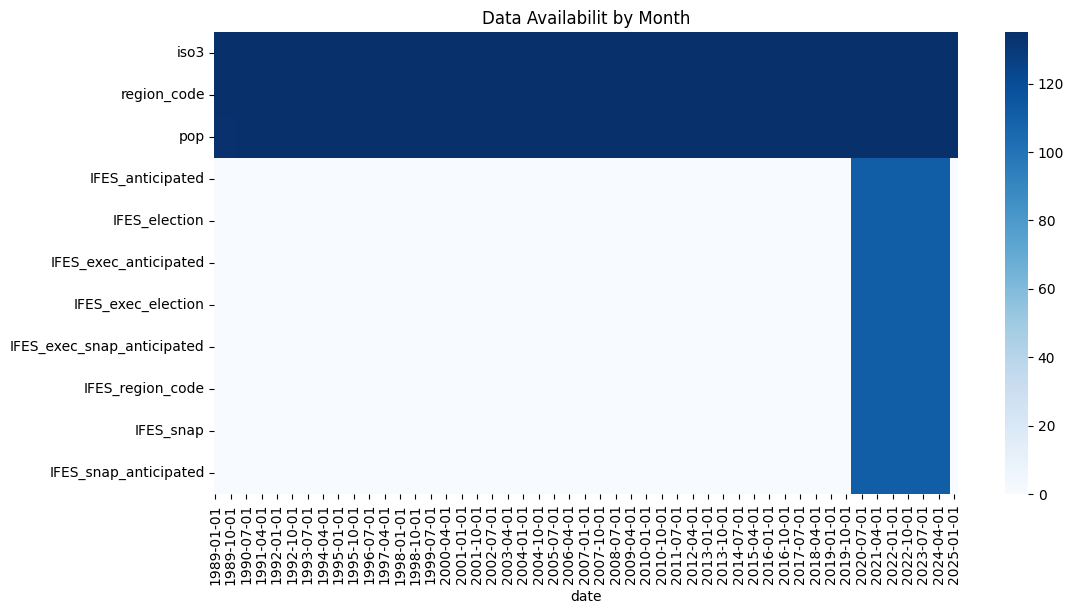

In [5]:
missing_by_month = df.groupby('date').count()
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

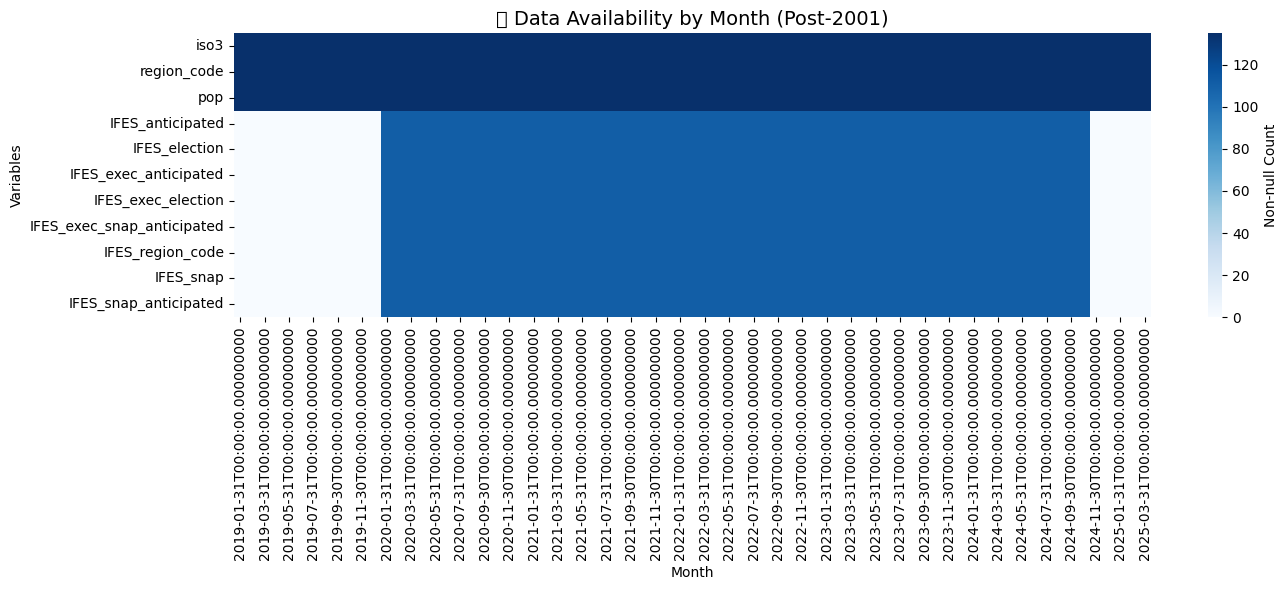

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Convert 'yearmon' to datetime format
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce')

# Step 2: Drop rows before 2001
df = df[df['date'] >= pd.to_datetime('2019-01-01')]

# Step 3: Set 'date' as index
df = df.set_index('date').sort_index()

# Step 4: Drop the original 'yearmon' column (optional)
df = df.drop(columns=['yearmon'])

# Step 5: Group by month and count non-null values
missing_by_month = df.groupby(pd.Grouper(freq='M')).count()

# Step 6: Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues', cbar_kws={'label': 'Non-null Count'})
plt.title('📅 Data Availability by Month (Post-2001)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()


### Sample data and features

In [9]:
df.tail().T

date,2025-03-01,2025-03-01,2025-03-01,2025-03-01,2025-03-01
iso3,MNE,KAZ,SWZ,AGO,ZWE
region_code,ECA,ECA,SSA,SSA,SSA
pop,616177.0,20330104.0,1230506.0,36749906.0,16340822.0
IFES_anticipated,<NA>,<NA>,<NA>,<NA>,<NA>
IFES_election,<NA>,<NA>,<NA>,<NA>,<NA>
IFES_exec_anticipated,<NA>,<NA>,<NA>,<NA>,<NA>
IFES_exec_election,<NA>,<NA>,<NA>,<NA>,<NA>
IFES_exec_snap_anticipated,<NA>,<NA>,<NA>,<NA>,<NA>
IFES_region_code,<NA>,<NA>,<NA>,<NA>,<NA>
IFES_snap,<NA>,<NA>,<NA>,<NA>,<NA>


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10125 entries, 2019-01-01 to 2025-03-01
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   iso3                        10125 non-null  string 
 1   region_code                 10125 non-null  string 
 2   pop                         10125 non-null  Float64
 3   IFES_anticipated            6438 non-null   Float64
 4   IFES_election               6438 non-null   Int64  
 5   IFES_exec_anticipated       6438 non-null   Float64
 6   IFES_exec_election          6438 non-null   Int64  
 7   IFES_exec_snap_anticipated  6438 non-null   Float64
 8   IFES_region_code            6438 non-null   string 
 9   IFES_snap                   6438 non-null   Int64  
 10  IFES_snap_anticipated       6438 non-null   Float64
dtypes: Float64(5), Int64(3), string(3)
memory usage: 1.0 MB


### Descriptive statistics of categorical columns

In [11]:
df.describe(include='string').T

,count,unique,top,freq
iso3,10125,135,AFG,75
region_code,10125,6,SSA,3525
IFES_region_code,6438,6,SSA,2320


### Descriptive statistics of numerical columns

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pop,10125.0,49688493.123852,174238571.465044,9816.0,2528654.0,11021177.0,33787914.0,1438069596.0
IFES_anticipated,6438.0,-inf,<NA>,-inf,0.0,0.0,0.0,1.0
IFES_election,6438.0,0.032308,0.176831,0.0,0.0,0.0,0.0,1.0
IFES_exec_anticipated,6438.0,-inf,<NA>,-inf,0.0,0.0,0.0,1.0
IFES_exec_election,6438.0,0.013979,0.117415,0.0,0.0,0.0,0.0,1.0
IFES_exec_snap_anticipated,6438.0,-inf,<NA>,-inf,0.0,0.0,0.0,1.0
IFES_snap,6438.0,0.004349,0.06581,0.0,0.0,0.0,0.0,1.0
IFES_snap_anticipated,6438.0,-inf,<NA>,-inf,0.0,0.0,0.0,1.0


### Deatils of missing values in the features

In [13]:
total_rows = len(df)
missing_count = df.isnull().sum()
missing_percent = (missing_count / total_rows * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage (%)': missing_percent})
missing_df = missing_df.sort_values(by='Missing Percentage (%)', ascending=False)
missing_df

,Missing Count,Missing Percentage (%)
IFES_exec_anticipated,3687,36.41
IFES_election,3687,36.41
IFES_anticipated,3687,36.41
IFES_exec_snap_anticipated,3687,36.41
IFES_region_code,3687,36.41
IFES_snap,3687,36.41
IFES_exec_election,3687,36.41
IFES_snap_anticipated,3687,36.41
pop,0,0.00
iso3,0,0.00


In [14]:
columns = missing_df[missing_df['Missing Percentage (%)'] < 70].index
df = df[columns]

numeric_df = df.select_dtypes(include=['number']).dropna()


In [15]:
missing_by_iso3 = df.groupby('iso3').count()
missing_by_month = df.groupby('date').count()

### Availability of data by country

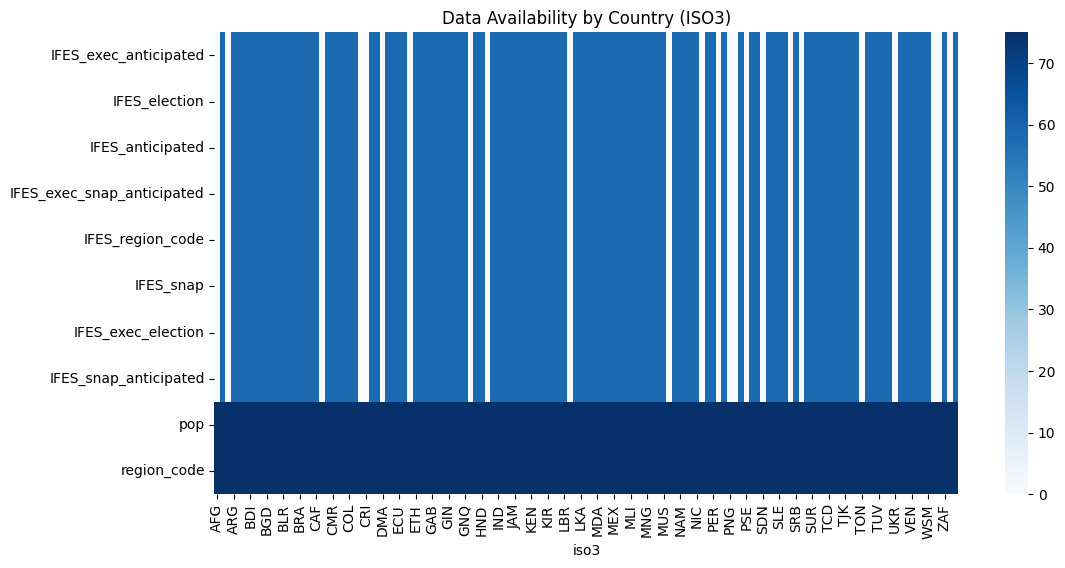

In [16]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_iso3.astype(float).T, cmap='Blues')
plt.title('Data Availability by Country (ISO3)')
plt.show()

### Availability of data by month

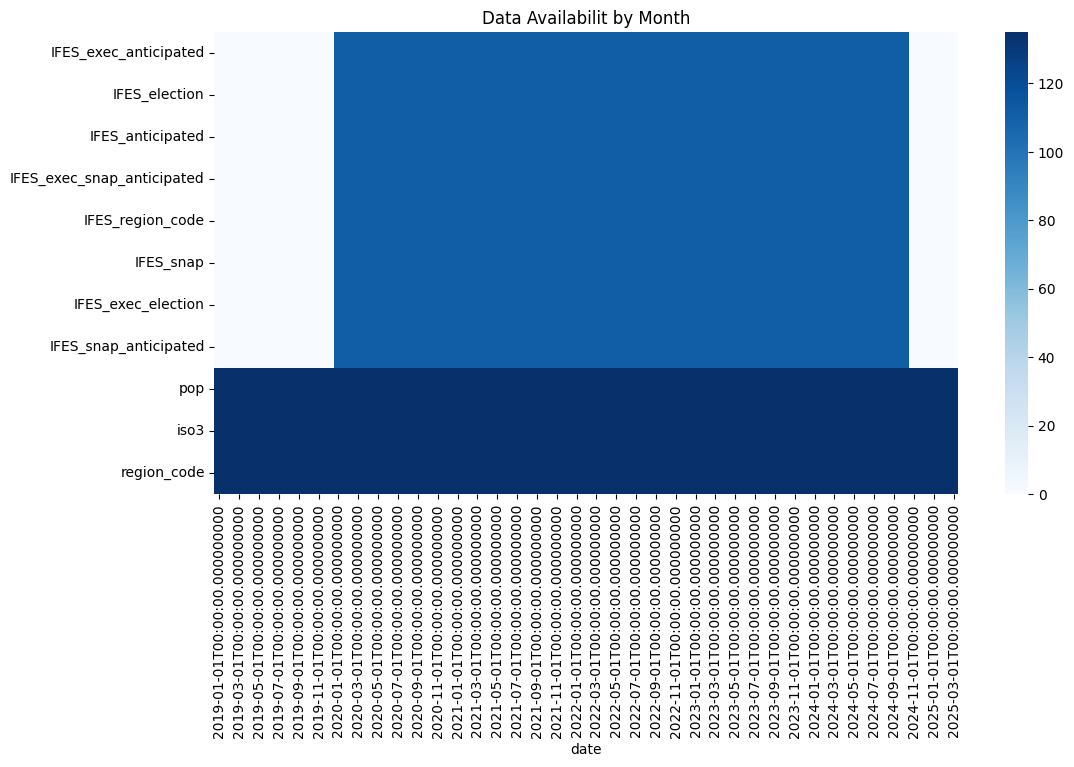

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

In [18]:
#Correlation Matrix
correlation_matrix_df = numeric_df.corr(method='pearson')

### Correlation between the features

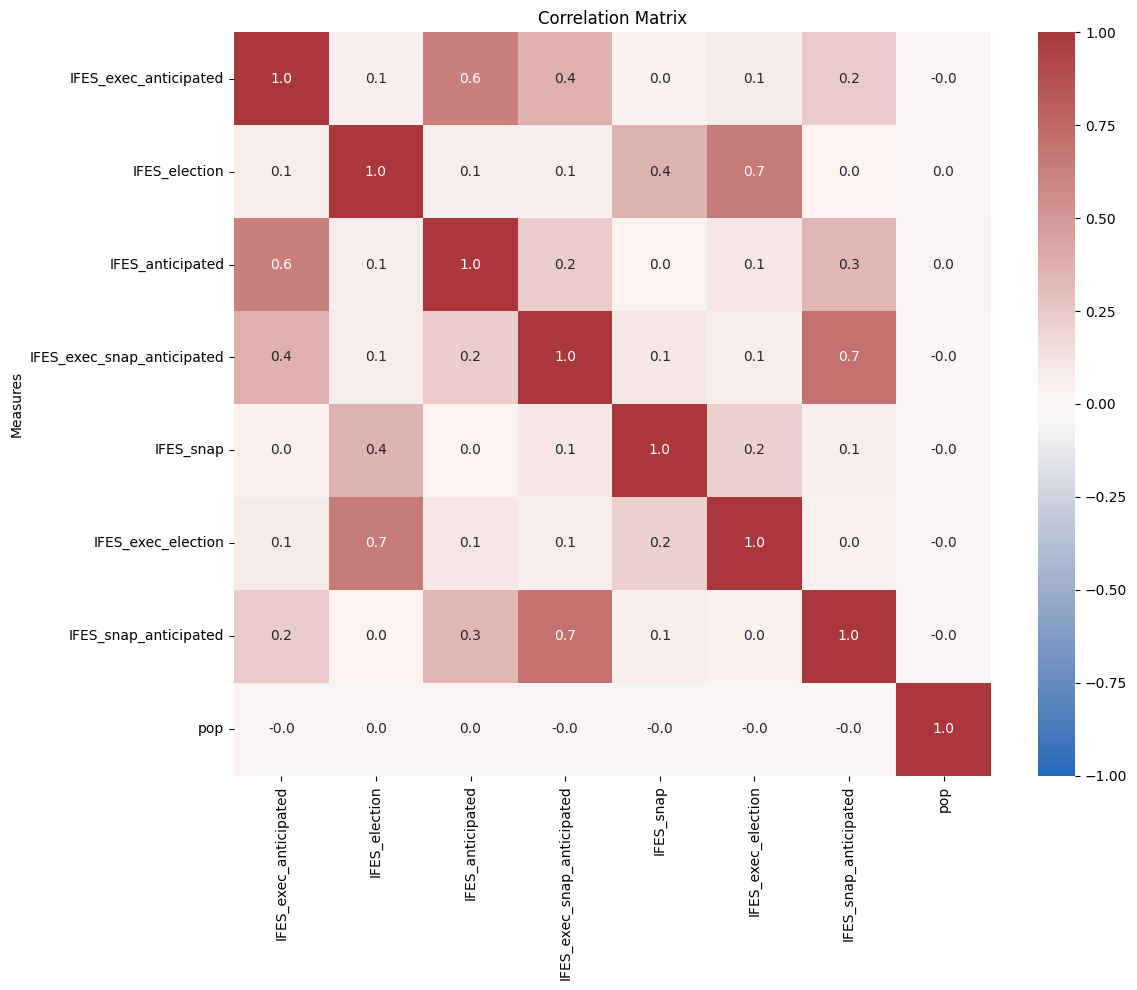

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

In [20]:
numeric_df.shape

(6438, 8)

In [27]:
import numpy as np

# Replace inf and -inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows or columns with NaN values
df.dropna(inplace=True)

# OR (alternative): Fill NaNs with 0 or mean
# df.fillna(0, inplace=True)  # or use df.fillna(df.mean(), inplace=True)
import numpy as np

numeric_df.replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean = numeric_df.dropna()  # or use df_numeric.fillna(0)


### Principal Components Analysis of the features

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)
pca = PCA(n_components=0.75)
X_pca = pca.fit_transform(X_scaled)
n_components = X_pca.shape[1]
print(f"Number of components retained: {n_components}")
columns = [f'PC{i+1}' for i in range(n_components)]
print(f"Column names for PCA components: {columns}")

Number of components retained: 4
Column names for PCA components: ['PC1', 'PC2', 'PC3', 'PC4']


In [30]:
pca_df = pd.DataFrame(X_pca, index=df_clean.index, columns=columns)

In [31]:
pca_correlation_matrix_df = pca_df.corr(method='pearson')

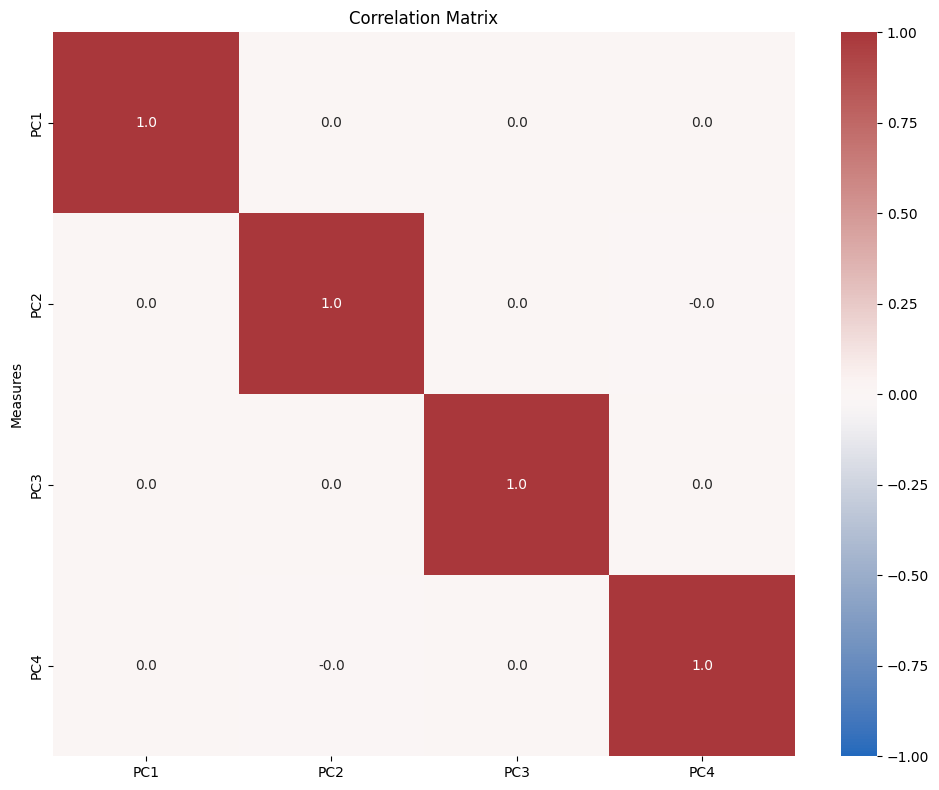

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(pca_correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

### Explained Variance by Principal Component

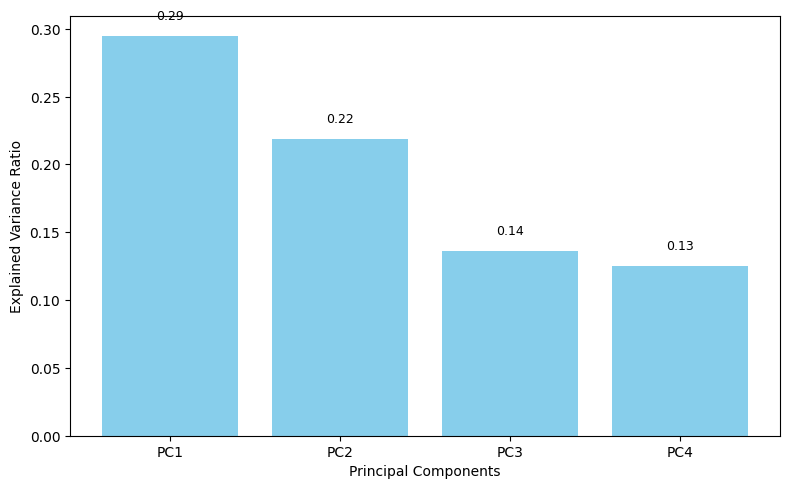

In [33]:
# Get explained variance ratios
explained_variance = pca.explained_variance_ratio_
components = np.arange(1, len(explained_variance) + 1)
labels = [f'PC{i}' for i in components]

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(x=components, height=explained_variance, tick_label=labels, color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
# plt.title('Explained Variance by Principal Component')
plt.tight_layout()
plt.show()

### Cumulative Explained Variance

Cumulative explained variance at component 2: 0.5135


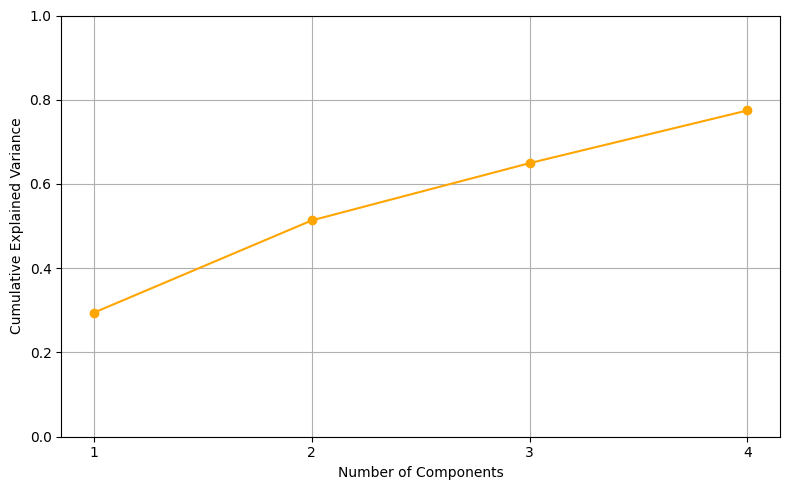

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `pca` has already been fitted
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Specify the component number (e.g., n = 4)
n = 2 # Change this to your desired component index
if n <= len(cumulative_variance):
    print(f"Cumulative explained variance at component {n}: {cumulative_variance[n-1]:.4f}")
else:
    print(f"Component {n} exceeds the total number of components ({len(cumulative_variance)}).")

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(1, len(cumulative_variance) + 1, step=1))
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
feature_names = numeric_df.columns
components = pca.components_
loadings_df = pd.DataFrame(components.T, index=feature_names, columns=[f'PC{i+1}' for i in range(components.shape[0])])

### PCA Loadings Heatmap

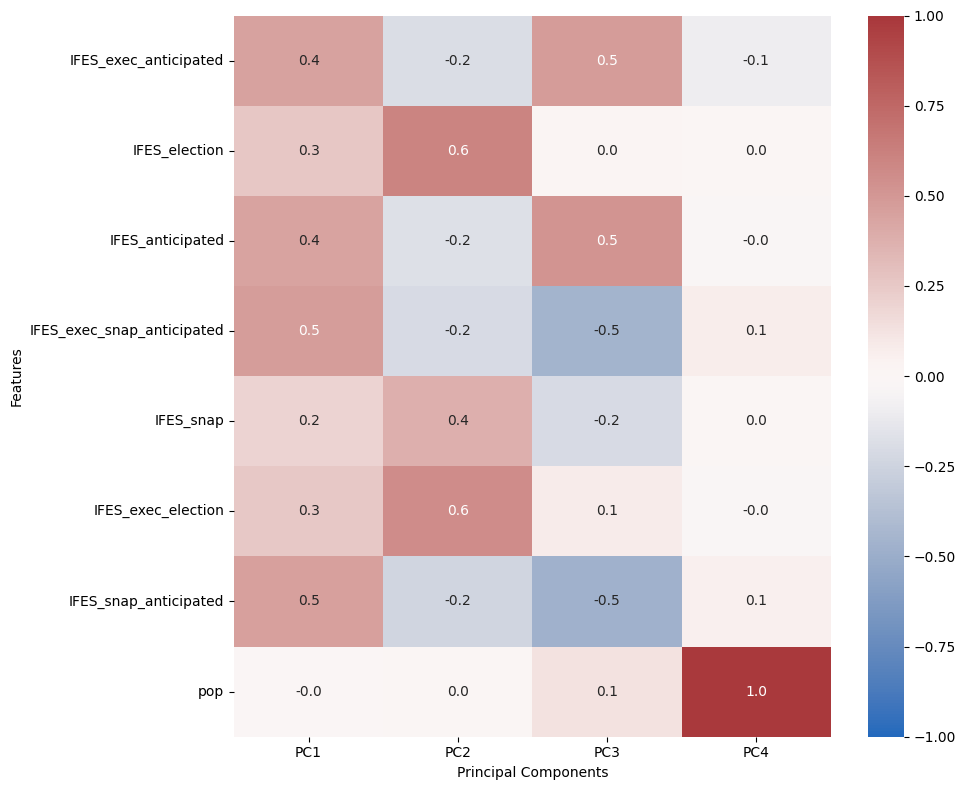

In [36]:
# create heatmap from loadings_df using sns
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
# plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [37]:
# Print PCA loadings matrix as plain text
print("🔢 PCA Loadings Matrix:\n")
print(loadings_df.round(2))  # Round to 2 decimal places for readability


🔢 PCA Loadings Matrix:

                             PC1   PC2   PC3   PC4
IFES_exec_anticipated       0.45 -0.19  0.48 -0.10
IFES_election               0.26  0.61  0.02  0.01
IFES_anticipated            0.44 -0.18  0.52 -0.02
IFES_exec_snap_anticipated  0.48 -0.21 -0.46  0.07
IFES_snap                   0.20  0.38 -0.21  0.01
IFES_exec_election          0.26  0.56  0.08 -0.02
IFES_snap_anticipated       0.46 -0.24 -0.47  0.06
pop                        -0.01  0.00  0.13  0.99


## Physical Interpretation

### PC1-General Election & Executive Anticipation Index, captures the general anticipation or planning of electoral events, especially executive elections and snap decisions. A high PC1 score means the country is in a phase of political pre-election tension or planning, especially involving the executive branch.

### PC2- Actual Electoral Activity Index, PC2 reflects actual electoral occurrences, not just anticipation. A high PC2 score means recent elections (including executive) were actually held.
